<a href="https://colab.research.google.com/github/HaranGilboa/DL/blob/main/Clustering_of_Time_Series_multivariant_data_Using_LSTM_BASED_ENCODER_DECODER_.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
# Import the required module to mount Google Drive to Colab
from google.colab import drive

# Mount the Google Drive to '/content/drive'
drive.mount('/content/drive')



MessageError: ignored

In [ ]:
# pip installs
!pip install scikit-learn-extra
!pip install kneed
!pip install dtaidistance
!pip install pyclustering
!pip install --upgrade numpy
!pip install tslearn

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.0/2.0 MB 11.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.4/2.4 MB 7.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.6/2.6 MB 21.4 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Created wheel for pyclustering: filename=pyclustering-0.10.1.2-py3-none-any.whl size=2395106 sha256=4427fa509aeeb6a3c4cbb9f33c911af88c454ca8d1b7518b3a4c352f04b493b6
  Stored in directory: /root/.cache/pip/wheels/b5/42/97/11eee99f5c1e4fdfc170f0a54f9c9eb195df66edb4cf69f449
Successfully built pyclustering
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 17.6/17.6 MB 31.5 MB/s eta 0:00:00
  Attempting uninstall: numpy
    Found existing installation: numpy 1.22.4
    Uninstalling numpy-1.22.4:
      Successfully uninstalled numpy-1.22.4
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
numba 0.56

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 368.5/368.5 kB 5.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 17.1/17.1 MB 57.5 MB/s eta 0:00:00
  Attempting uninstall: numpy
    Found existing installation: numpy 1.25.1
    Uninstalling numpy-1.25.1:
      Successfully uninstalled numpy-1.25.1


In [ ]:
# imports
from keras.preprocessing.text import one_hot,Tokenizer
from keras.utils import pad_sequences
from keras.models import Sequential, Model
from keras.layers.core import Activation, Dropout, Dense
from keras.layers import ELU, PReLU, LeakyReLU

from tensorflow import feature_column, keras
from tensorflow.keras.utils import plot_model
from tensorflow.keras import layers

from keras.layers import Dense, LSTM, GRU, dot, Input, Embedding, \
 TimeDistributed, Dropout, Bidirectional, Concatenate, GlobalMaxPooling1D
import tensorflow as tf
from tensorflow.keras.layers import Input, LSTM, Concatenate, Dense, Dropout, BatchNormalization, TimeDistributed
from tensorflow.keras.layers import  GRU, Concatenate, dot, Activation, Embedding, Flatten, RepeatVector


from sklearn.datasets import make_blobs
from sklearn.cluster import KMeans, DBSCAN, OPTICS, AffinityPropagation
from sklearn.metrics import silhouette_samples, silhouette_score
from sklearn.decomposition import PCA,TruncatedSVD,KernelPCA
from sklearn.manifold import TSNE,MDS,Isomap
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, OneHotEncoder, StandardScaler
from sklearn.metrics.pairwise import pairwise_distances, euclidean_distances
from sklearn.metrics import davies_bouldin_score
from sklearn_extra.cluster import KMedoids
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis as LDA
from sklearn.manifold import LocallyLinearEmbedding
from dtaidistance import dtw, clustering
from mpl_toolkits.mplot3d import Axes3D
from plotly.subplots import make_subplots
from numpy import unique
from numpy import where
from kneed import KneeLocator
from os import listdir
from os.path import isfile, join
from random import randrange
from tqdm import tqdm

import pandas as pd
import numpy as np
import tensorflow as tf
import matplotlib.pyplot as plt
import matplotlib.cm as cm
import pickle
import datetime
import plotly.express as px
import seaborn as sns
import plotly.graph_objects as go
from datetime import timedelta
from tslearn.clustering import TimeSeriesKMeans
from collections import OrderedDict




data loading:

In [ ]:
my_drive_path = '/content/drive/My Drive/'


In [ ]:
file_path = '/content/drive/My Drive/DL_data_all_325_11_7_60.csv'

df = pd.read_csv(file_path)
df.head(5)

,Unnamed: 0.1,ref_app_id,ref_publisher_id,platform,ref_geo_group_id,day_date,impressions,clicks,revenue,sessions,...,metric,Unnamed: 0,impressions_without_offerwall,revenue_without_offerwall,clicks_without_offerwall,completions_without_offerwall,impressions_without_offerwall_with_nan,revenue_without_offerwall_with_nan,clicks_without_offerwall_with_nan,completions_without_offerwall_with_nan
0,0,82155,1043,2,14,2023-05-01 00:00:00,9628,0,99.178791,0,...,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,1,82155,1043,2,14,2023-05-02 00:00:00,9918,0,84.584360,0,...,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,2,82155,1043,2,14,2023-05-03 00:00:00,8867,0,85.053085,0,...,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,3,82155,1043,2,14,2023-05-04 00:00:00,10191,0,93.082006,0,...,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,4,82155,1043,2,14,2023-05-05 00:00:00,12015,0,111.839401,0,...,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


TS identifications:

In [ ]:
permutations_cols = ['ref_app_id', 'platform', 'ref_geo_group_id']

add id column:

In [ ]:
df['id'] = ''
first = True
for id in permutations_cols:
    if first:
        df['id'] = df[id].astype(str)
    else:
        df['id'] = df['id'] + '_' + df[id].astype(str)
    first = False


In [ ]:
df['day_date'] = pd.to_datetime(df['day_date'])

In [ ]:
Gr = df.groupby(['id'])

TS metrics:

In [ ]:
metric_lst = ['revenue','impressions','clicks']

values Hist:

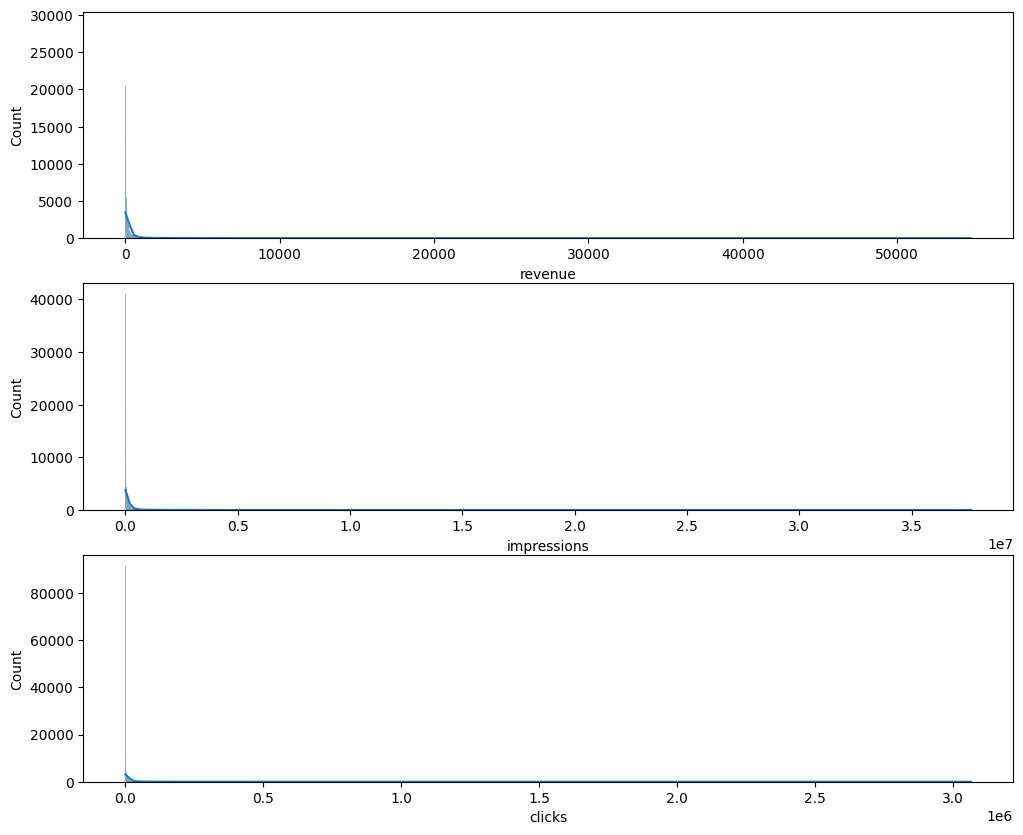

In [ ]:
# Plot distributions
plt.figure(figsize=(12,10))# Plot distribution of R
plt.subplot(3, 1, 1); sns.histplot(df[metric_lst[0]], kde=True,)# Plot distribution of F
plt.subplot(3, 1, 2); sns.histplot(df[metric_lst[1]], kde=True)# Plot distribution of M
plt.subplot(3, 1, 3); sns.histplot(df[metric_lst[2]], kde=True)# Show the plot
plt.show()

transform to diff from yesterday:

In [ ]:
d = 1
df_percent_diff = df.copy()
for target in metric_lst:
  str_ld = f'{target}_LD{d}'
  perm_data = df_percent_diff[['id'] + ['day_date', target]].copy()
  perm_data[target] = perm_data[target].astype(float)
  date_date = df_percent_diff['day_date'] - timedelta(d)
  df_percent_diff[f'{str_ld}_date'] = date_date
  perm_data.rename({'day_date': f'{str_ld}_date', target: str_ld}, axis=1, inplace=True)
  df_percent_diff = pd.merge(df_percent_diff, perm_data,
                                        on=['id'] + [f'{str_ld}_date'], how='left')
  perm_data.rename({f'{str_ld}_date': 'day_date', str_ld: target}, axis=1, inplace=True)
  df_percent_diff.drop(f'{str_ld}_date', axis=1, inplace=True)
  df_percent_diff[f'{target}_diff'] = df_percent_diff[f'{target}']/df_percent_diff[f'{target}_LD{d}']
  df_percent_diff[f'{target}_diff'] = np.where(df_percent_diff[f'{target}_diff'] < 5, df_percent_diff[f'{target}_diff'], 5)
null_cond = ~(np.nansum(pd.isnull(df_percent_diff[[f'{metric}_diff' for metric in metric_lst]]), axis=1)==len(metric_lst))
df_percent_diff = df_percent_diff[null_cond]





data hist after transformation:

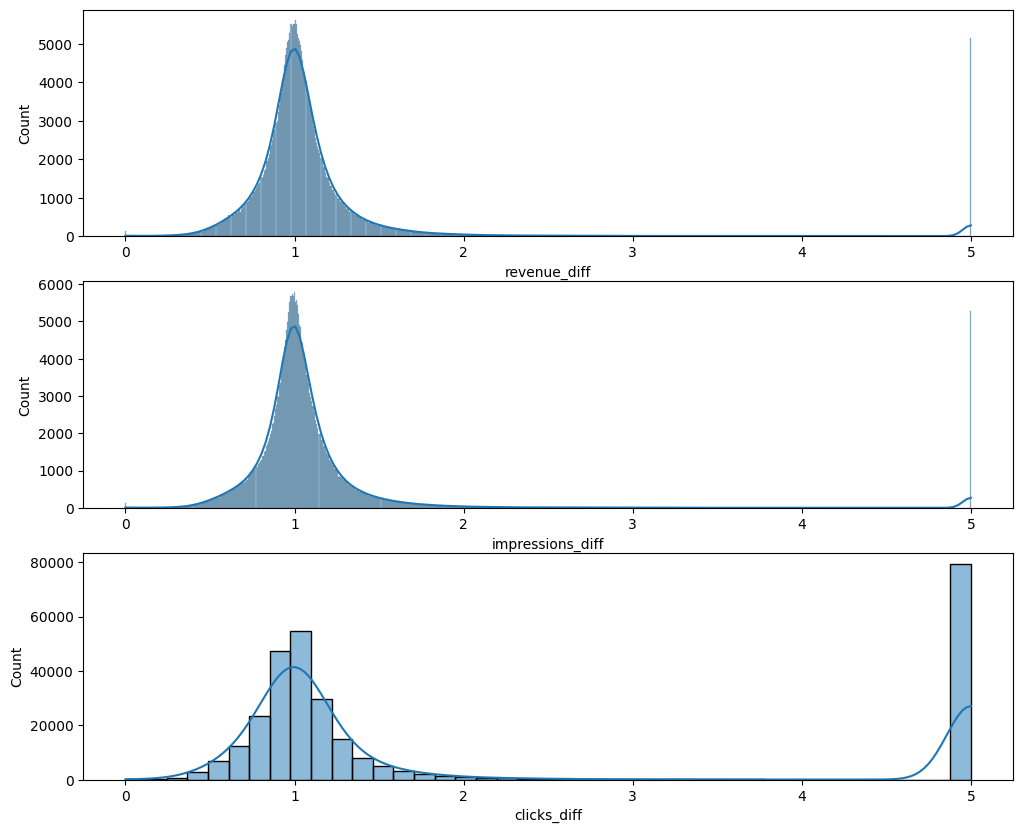

In [ ]:
# Plot distributions after transformation:
plt.figure(figsize=(12,10))# Plot distribution of R
plt.subplot(3, 1, 1); sns.histplot(df_percent_diff[f'{metric_lst[0]}_diff'], kde=True,)# Plot distribution of F
plt.subplot(3, 1, 2); sns.histplot(df_percent_diff[f'{metric_lst[1]}_diff'], kde=True)# Plot distribution of M
plt.subplot(3, 1, 3); sns.histplot(df_percent_diff[f'{metric_lst[2]}_diff'], kde=True)# Show the plot
plt.show()

data normalization:

In [ ]:
df_rfm = df_percent_diff[[f'{metric_lst[0]}_diff', f'{metric_lst[1]}_diff', f'{metric_lst[2]}_diff', 'day_date']]
df_rfm['day_date'] = df_rfm['day_date'].astype(int) // 10**9

standard_scaler = StandardScaler()
X_rfm = standard_scaler.fit_transform(df_rfm)

RFM_norm1 = pd.DataFrame(X_rfm)
RFM_norm1.columns = metric_lst + ['day_date_norm']
RFM_norm1[['id', 'day_date']] = df_percent_diff[['id', 'day_date']]
RFM_norm1 = pd.merge(df.loc[null_cond, ['id', 'day_date']], RFM_norm1, on=['id', 'day_date'], how='inner')
RFM_norm1.head()

<ipython-input-60-a6faffc8f554>:2: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



,id,day_date,revenue,impressions,clicks,day_date_norm
0,82155_2_14,2023-05-01,6.707051,6.675165,1.632323,-1.718967
1,82155_2_14,2023-05-02,-0.419743,-0.117604,1.632323,-1.670741
2,82155_2_14,2023-05-03,-0.157341,-0.350463,1.632323,-1.622514
3,82155_2_14,2023-05-04,-0.004641,0.086352,1.632323,-1.574288
4,82155_2_14,2023-05-05,0.179435,0.137109,1.632323,-1.526062


data hist after normalization

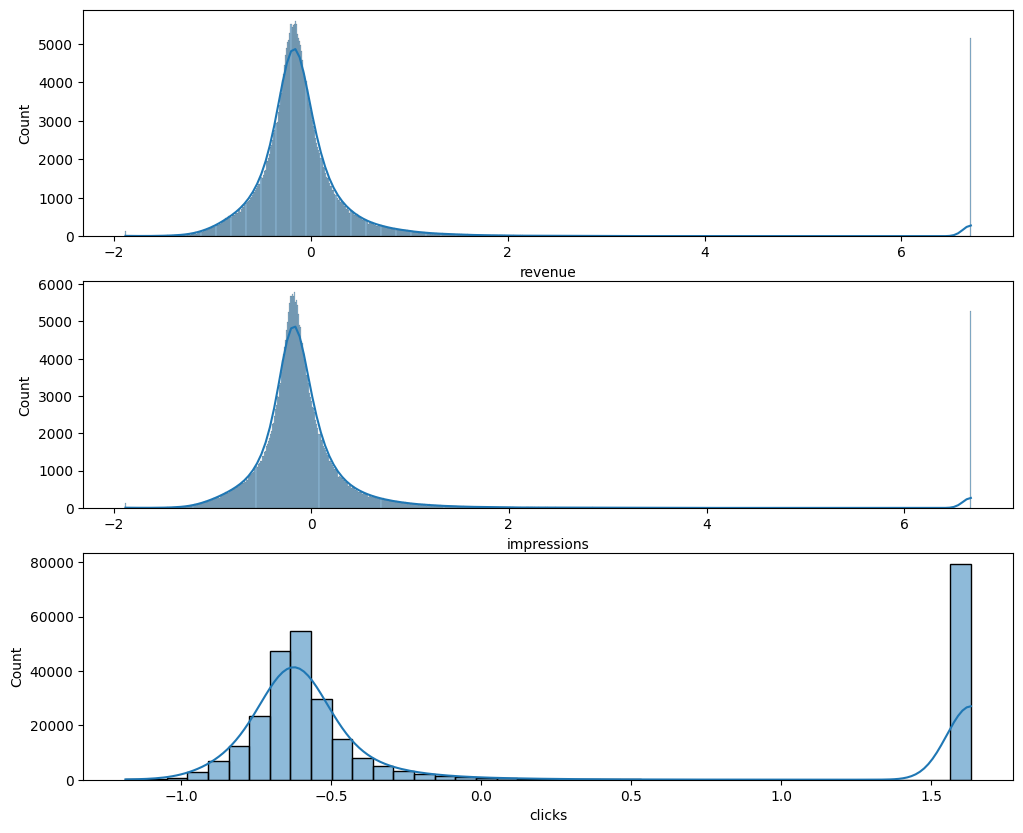

In [ ]:
# Plot distributions after normalization
plt.figure(figsize=(12,10))# Plot distribution of R
plt.subplot(3, 1, 1); sns.histplot(RFM_norm1[metric_lst[0]], kde=True,)# Plot distribution of F
plt.subplot(3, 1, 2); sns.histplot(RFM_norm1[metric_lst[1]], kde=True)# Plot distribution of M
plt.subplot(3, 1, 3); sns.histplot(RFM_norm1[metric_lst[2]], kde=True)# Show the plot
plt.show()

add groupby

In [ ]:
df_permutations_grouped = RFM_norm1.set_index('id')
df_permutations_grouped = df_permutations_grouped.sort_values('day_date')
df_permutations_grouped = df_permutations_grouped.groupby(['id'])

df_permutations_grouped

adjust data to sequence structer

In [ ]:
sequence_input_list = []
sequence_output_list = []
for k, v in df_permutations_grouped:
  permutaions_array = v[metric_lst + ['day_date_norm']].values
  array = permutaions_array.copy()

  # Add start and end to the sequence of transactions
  add_start_to_array = np.insert(array, 0, [-1, -1, -1, -1], axis=0)
  input_array = np.append(add_start_to_array, [[-2, -2, -2, -2]], axis=0)
  output_array = np.append(array, [[-2, -2, -2, -2]], axis=0)

  # # Resize arrays to max_length
  max_days = 60
  input_array.resize((max_days, 4), refcheck=False)
  output_array.resize((max_days, 4), refcheck=False)

  # Append them to the list
  sequence_input_list.append(input_array)
  sequence_output_list.append(output_array)

sequence_input_array = np.array(sequence_input_list)
sequence_output_input_array = sequence_input_array
sequence_output_array = np.array(sequence_output_list)
sequence_output_array.shape

<ipython-input-63-aa31aa126eb9>:3: FutureWarning:

In a future version of pandas, a length 1 tuple will be returned when iterating over a groupby with a grouper equal to a list of length 1. Don't supply a list with a single grouper to avoid this warning.



(4135, 60, 4)

 Data Preprocessing for Embeddings

In [ ]:
# Initialize data structures
embedded_cols = OrderedDict()   # A dictionary to store the number of unique categories in each column
label_encoders = OrderedDict()  # A dictionary to store LabelEncoders for each column
cont_cols = []                  # A list to store the names of continuous columns

# Loop through the columns in 'permutations_cols'
for col in permutations_cols:
    # Encode categorical columns using LabelEncoder
    label_encoders[col] = LabelEncoder().fit(df[col])
    df[col] = label_encoders[col].transform(df[col])

    # Convert the encoded columns to the 'category' data type for embedding compatibility
    df[col] = df[col].astype('category')

    # Count the number of unique categories in each column and store it in 'embedded_cols'
    embedded_cols[col] = len(df[col].unique())

    print(col, len(df[col].unique()))

df[permutations_cols].head()

ref_app_id 442
platform 3
ref_geo_group_id 146


,ref_app_id,platform,ref_geo_group_id
0,151,1,2
1,151,1,2
2,151,1,2
3,151,1,2
4,151,1,2


In [ ]:
embedding_sizes = [(n_categories, min(20, (n_categories+1)//2)) for _,n_categories in embedded_cols.items()]
embedding_sizes

[(442, 20), (3, 2), (146, 20)]

adjust data to sequence structer

In [ ]:
df_embeddings_grouped = df.groupby(['id'])

# Initialize lists to store the input and output arrays for embeddings
embedding_input_list = []
embedding_output_list = []

for k, v in df_embeddings_grouped:
    # Extract the permutations columns' values from the group DataFrame as a numpy array
    permutaions_array = v[permutations_cols].values
    array = permutaions_array.copy()

    # Add start and end tokens to the sequence of transactions
    add_start_to_array = np.insert(array, 0, [-1, -1, -1], axis=0)
    input_array = np.append(add_start_to_array, [[-2, -2, -2]], axis=0)
    output_array = np.append(array, [[-2, -2, -2]], axis=0)

    # Resize arrays to a fixed max_days length (here, 60)
    max_days = 60
    input_array.resize((max_days, 4), refcheck=False)
    output_array.resize((max_days, 4), refcheck=False)

    # Append the input and output arrays to their respective lists
    embedding_input_list.append(input_array)
    embedding_output_list.append(output_array)

embedding_input_array = np.array(embedding_input_list)
embedding_output_input_array = embedding_input_array
embedding_output_array = np.array(embedding_output_list)
embedding_output_array.shape

<ipython-input-66-79d055ecb590>:7: FutureWarning:

In a future version of pandas, a length 1 tuple will be returned when iterating over a groupby with a grouper equal to a list of length 1. Don't supply a list with a single grouper to avoid this warning.



(4135, 60, 4)

permutations identifiers

In [ ]:
# Combine the RFM_norm1 and the df permutations_cols columns
# to create the normelaize_data  containing both RFM normalized data and permutations columns data.
normelaize_data = pd.concat([RFM_norm1, df[permutations_cols]], axis=1)

# Create a list of unique 'id's from the df_permutations_grouped and initialize the static_input_list
list_of_permutations_ids = list(df_permutations_grouped.groups.keys())
static_input_list = []

# Loop through each 'id' in the list of unique 'ids'.
for id in list_of_permutations_ids:
    # Extract the sub DataFrame for the current 'id'.
    sub_df = normelaize_data.loc[RFM_norm1['id'] == id]
    sub_df = sub_df.iloc[0]

    # Convert the selected row to a list representing the permutation static vector.
    permutation_static_vector = sub_df[permutations_cols].values.tolist()

    # Append the permutation's static vector to the 'static_input_list'.
    static_input_list.append(permutation_static_vector)

# Convert the 'static_input_list' into a numpy array to create the final 'static_input_array'.
static_input_array = np.array(static_input_list)
static_output_array = static_input_array

print(static_input_array.shape)
static_input_array

(4135, 3)


array([[  0,   0,  36],
       [  0,   0,  66],
       [  0,   0,  67],
       ...,
       [395,   1,  67],
       [395,   1,  23],
       [396,   1,  67]])

Setting Up Tensor Processing Units (TPUs)

In [ ]:
import tensorflow as tf
try:
  resolver = tf.distribute.cluster_resolver.TPUClusterResolver()
  tf.config.experimental_connect_to_cluster(resolver)
  tf.tpu.experimental.initialize_tpu_system(resolver)
  print("All devices: ", tf.config.list_logical_devices('TPU'))
  strategy = tf.distribute.experimental.TPUStrategy(resolver)
except ValueError:
  strategy = tf.distribute.get_strategy()

Kmean evaluation functions

In [ ]:
kmeans_kwargs = {
  "init": "random",
  "n_init": 10,
  "max_iter": 300,
  }

def elbow_method(X):
  # A list holds the SSE values for each k
  sse = []
  for k in range(1, 11):
      kmeans = KMeans(n_clusters = k, **kmeans_kwargs)
      kmeans.fit(X)
      sse.append(kmeans.inertia_)
  plt.style.use("fivethirtyeight")
  plt.plot(range(1, 11), sse)
  plt.xticks(range(1, 11))
  plt.xlabel("Number of Clusters")
  plt.ylabel("SSE")
  plt.show()
  kl = KneeLocator(range(1, 11), sse, curve="convex", direction="decreasing")
  print("Optimum number of clusters is: ", kl.elbow)
  return int(kl.elbow)

def plot_clustering(X, labels):
  if X.shape[1] == 3:
    df = pd.DataFrame({'feature1':X[:, 0],'feature2':X[:, 1],'feature3':X[:, 2],'labels':labels})
    fig = go.Figure(data=go.Scatter3d(
        x = df['feature1'],
        y = df['feature2'],
        z = df['feature3'],
        mode='markers',
        marker=dict(
            color=df['labels'],
            colorscale='Viridis',
            line_width=1
        )
    ))
    fig.update_layout(
        xaxis_title="1st principal component",
        yaxis_title="2nd principal component",
        font=dict(
            family="Courier New, monospace",
            size=18,
            color="RebeccaPurple",
        ),
        title={
          'text': "Plot Customer Clustering",
          'y':0.9,
          'x':0.5,
          'xanchor': 'center',
          'yanchor': 'top'}

    )
    fig.show()
  else:
    df = pd.DataFrame({'feature1':X[:, 0],'feature2':X[:, 1],'labels':labels})
    fig = go.Figure(data=go.Scattergl(
        x = df['feature1'],
        y = df['feature2'],
        mode='markers',
        marker=dict(
            color=df['labels'],
            colorscale='Viridis',
            line_width=1
        )
    ))
    fig.update_layout(
        xaxis_title="1st principal component",
        yaxis_title="2nd principal component",
        font=dict(
            family="Courier New, monospace",
            size=18,
            color="RebeccaPurple",
        ),
        title={
          'text': "Plot Customer Clustering",
          'y':0.9,
          'x':0.5,
          'xanchor': 'center',
          'yanchor': 'top'}

    )
    fig.show()

def do_kmeans(X, n_clusters):
  kmeans = KMeans(n_clusters = n_clusters, **kmeans_kwargs)
  kmeans.fit(X)
  print(set(kmeans.labels_))

  silhouette_avg = silhouette_score(X, kmeans.labels_)

  print("Silhouette: ", silhouette_avg , " The best value is 1 and the worst value is -1.")
  print("Davies–Bouldin index: ", davies_bouldin_score(X, kmeans.labels_), " lower values indicating better clustering.")
  plot_clustering(X, kmeans.labels_)

for DTW

In [ ]:
sequence_input_array_2_dim = sequence_input_array.reshape(sequence_input_array.shape[0],-1)
sequence_input_array_2_dim

array([[-1.        , -1.        , -1.        , ..., -0.09858376,
        -0.63476586,  1.07815737],
       [-1.        , -1.        , -1.        , ..., -0.28942332,
        -0.68512388,  1.07815737],
       [-1.        , -1.        , -1.        , ..., -0.1990454 ,
        -0.71686506,  1.07815737],
       ...,
       [-1.        , -1.        , -1.        , ...,  0.00594472,
         1.632323  ,  1.07815737],
       [-1.        , -1.        , -1.        , ..., -0.72247549,
         1.632323  ,  1.07815737],
       [-1.        , -1.        , -1.        , ...,  0.24972396,
         1.632323  ,  1.07815737]])

NN models

original model

In [ ]:
def create_model():
    latent_dim = 16
    decoder_dim = 4
    num_dynamic_features = 4

    ###########################################  Encoder  ###########################################

    # Input for the Encoder: Sequence input shape is N*4, where N is the sequence length and 4 is the number of dynamic features.
    sequence_input = Input(name='sequence_input', shape=(None, num_dynamic_features))

    # LSTM Encoder: The LSTM layer processes the input sequence and returns sequences as outputs.
    outputs = LSTM(128, return_sequences=True)(sequence_input)

    # LSTM Encoder with Latent Dimension: The second LSTM layer has return_state=True to get the hidden state and cell state.
    encoder_out, hidden_state, cell_state = LSTM(latent_dim, return_state=True, return_sequences=True)(outputs)

    # Concatenate hidden state and cell state to get the latent space.
    latent_space = Concatenate()([hidden_state, cell_state])

    # Additional Dense Layer for Latent Space: A Dense layer with 'relu' activation to create the latent space.
    latent_space = Dense(latent_dim, activation='relu', name='latent_space')(latent_space)

    ###########################################  /Encoder  ###########################################

    ###########################################  Decoder  ###########################################

    # Temporary input with a time step delay for producing sequence output.
    # This input is exactly similar to sequence_input with the only difference that it has a time step delay.
    sequence_output_input = Input(name='sequence_output_input', shape=(None, num_dynamic_features))

    # GRU Decoder: The GRU layer is used for the decoder.
    # The 'initial_state' is set to 'latent_space' from the encoder to initialize the decoder.
    decoder_out = GRU(latent_dim, return_sequences=True)(sequence_output_input, initial_state=latent_space)

    ###########################################  Attention  ###########################################

    # Attention Mechanism: Dot product attention between the decoder output and encoder output.
    attention = dot([decoder_out, encoder_out], axes=[2, 2])
    attention = Activation('softmax')(attention)
    context = dot([attention, encoder_out], axes=[2, 1])

    # Concatenate the context and decoder output to combine attention information.
    decoder_combined_context = Concatenate()([context, decoder_out])

    ###########################################  /Attention  ###########################################

    # Dense Layer for Decoder Output: A TimeDistributed Dense layer to produce the final decoder outputs.
    decoder_outputs = TimeDistributed(Dense(decoder_dim, activation='sigmoid'), name='decoder_outputs')(decoder_combined_context)

    ###########################################  /Decoder  ###########################################

    # Create the model with three inputs and two outputs (last input is temporary).
    model = Model(inputs=[sequence_input, sequence_output_input], outputs=[decoder_outputs])

    return model

model 2: LSTM(256), Dropout, BatchNormalization, another LSTM instead of GRU

In [ ]:

def create_model2():
    latent_dim = 16
    decoder_dim = 4
    num_dynamic_features = 4

    # Input for the Encoder: Sequence input shape is N*4, where N is the sequence length and 4 is the number of dynamic features.
    sequence_input = Input(name='sequence_input', shape=(None, num_dynamic_features))

    # LSTM Encoder: The LSTM layer processes the input sequence and returns sequences as outputs.
    outputs = LSTM(256, return_sequences=True)(sequence_input)
    outputs = Dropout(0.2)(outputs)
    outputs = BatchNormalization()(outputs)

    # LSTM Encoder with Latent Dimension: The second LSTM layer has return_state=True to get the hidden state and cell state.
    encoder_out, hidden_state, cell_state = LSTM(latent_dim, return_state=True, return_sequences=True)(outputs)

    # Dense Layer for Latent Space: A Dense layer with 'relu' activation to create the latent space.
    latent_space = Dense(latent_dim, activation='relu', name='latent_space')(hidden_state)

    ###########################################  Decoder  ###########################################

    # Temporary input with a time step delay for producing sequence output.
    # This input is exactly similar to sequence_input with the only difference that it has a time step delay.
    sequence_output_input = Input(name='sequence_output_input', shape=(None, num_dynamic_features))

    # LSTM Decoder with Latent Dimension and Initial State: The LSTM layer returns sequences, states, and uses the latent_space and cell_state from the encoder as initial states.
    decoder_out = LSTM(latent_dim, return_sequences=True, return_state=True)(sequence_output_input,
                                                                             initial_state=[latent_space, cell_state])

    ###########################################  Attention  ###########################################

    # Attention Mechanism: Dot product attention between the decoder output and encoder output.
    attention = tf.keras.layers.dot([decoder_out[0], encoder_out], axes=[2, 2])
    attention = tf.keras.layers.Activation('softmax')(attention)
    context = tf.keras.layers.dot([attention, encoder_out], axes=[2, 1])

    # Concatenate the context and decoder output to combine attention information.
    decoder_combined_context = tf.keras.layers.Concatenate()([context, decoder_out[0]])

    ###########################################  /Attention  ###########################################

    # Dense Layer for Decoder Output: A TimeDistributed Dense layer to produce the final decoder outputs.
    decoder_outputs = TimeDistributed(Dense(decoder_dim, activation='sigmoid'), name='decoder_outputs')(decoder_combined_context)

    # Additional TimeDistributed Dense Layer for the final output.
    decoder_outputs = TimeDistributed(Dense(decoder_dim, activation='sigmoid'), name='final_output')(decoder_outputs)

    ###########################################  /Decoder  ###########################################

    # Create the model with two inputs and one output for the final output.
    model = tf.keras.models.Model(inputs=[sequence_input, sequence_output_input], outputs=[decoder_outputs])

    return model

model 3: LSTM(256), embedding

In [ ]:
from tensorflow.keras.layers import Input, LSTM, Dense, GRU, Concatenate, dot, Activation, Embedding, Flatten, RepeatVector
from tensorflow.keras.models import Model

def create_model3():

  latent_dim = 16
  decoder_dim = 4
  num_dynamic_features = 4



  ###########################################  encoder  ###########################################

  # Sequence input shape is N*2 which N is sequence length and 2 is price and time
  sequence_input = Input(name='sequence_input', shape=(None, num_dynamic_features))

  # Many_to_one_lstm
  outputs = LSTM(128, return_sequences=True)(sequence_input)
  encoder_out, hidden_state, cell_state = LSTM(latent_dim, return_state=True, return_sequences=True)(outputs)

  ###########################################  categorical inputs  ###########################################

  # List to hold categorical input tensors
  categorical_inputs = []

  # # List to hold embedded categorical input tensors
  categorical_embeds = []

  categorical_embed_tensors = []
  count = 1
  for i, (num_categories, embedding_size) in enumerate(embedding_sizes):
      # Categorical input
      categorical_input = Input(name=f'embedding_input_{count}', shape=(None,))  # Shape is N*1
      categorical_inputs.append(categorical_input)

      # Embedding layer for categorical input
      categorical_embed = Embedding(input_dim=num_categories, output_dim=embedding_size, input_length=None)(categorical_input)
      categorical_embed = Flatten()(categorical_embed)

      # Append the tensor representation of the embedding
      categorical_embed_tensors.append(categorical_embed)
      count = count + 1


  encoder_out_pooled = GlobalMaxPooling1D()(encoder_out)
  encoder_out_combined = Concatenate()([encoder_out_pooled] + categorical_embeds)
  # Add a Flatten layer to ensure the input shape is defined for the Dense layer
  encoder_out_combined = Flatten()(encoder_out_combined)


  ###########################################  /categorical inputs  ###########################################

  # Layer below output can be used for clustering purposes
  latent_space = Dense(latent_dim, activation='relu', name='latent_space')(encoder_out_combined)

  # ###########################################  /encoder  ###########################################

  # ###########################################  decoder  ###########################################

  # Temporary input with a time step delay for producing sequence output
  # This input is exactly similar to sequence_input with only this difference that has a time step delay
  sequence_output_input = Input(name='sequence_output_input', shape=(None, num_dynamic_features))

  # One to many GRU (because of its simplicity, we used GRU instead of LSTM)
  decoder_out = GRU(latent_dim, return_sequences=True)(sequence_output_input, initial_state=latent_space)

  ###########################################  attention  ###########################################
  attention = dot([decoder_out, encoder_out], axes=[2, 2])
  attention = Activation('softmax')(attention)
  context = dot([attention, encoder_out], axes=[2, 1])
  decoder_combined_context = Concatenate()([context, decoder_out])
  ###########################################  /attention  ###########################################

  decoder_outputs = TimeDistributed(Dense(decoder_dim, activation='sigmoid'), name='decoder_outputs')(decoder_combined_context)

  ###########################################  /decoder  ###########################################

  # Model has three inputs and 2 outputs (last input is temporary)
  model = Model(inputs=[sequence_input] + categorical_inputs + [sequence_output_input],
                outputs=[decoder_outputs])

  return model

compile models

In [ ]:
strategy = tf.distribute.OneDeviceStrategy(device="/cpu:0")

with strategy.scope():
    model1 = create_model()
    model1.compile(optimizer=tf.keras.optimizers.Adam(),
                   loss=tf.keras.losses.MSE)
    model1.summary()

Model: "model_9"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 sequence_input (InputLayer)    [(None, None, 4)]    0           []                               
                                                                                                  
 lstm_11 (LSTM)                 (None, None, 128)    68096       ['sequence_input[0][0]']         
                                                                                                  
 lstm_12 (LSTM)                 [(None, None, 16),   9280        ['lstm_11[0][0]']                
                                 (None, 16),                                                      
                                 (None, 16)]                                                      
                                                                                            

In [ ]:
strategy = tf.distribute.OneDeviceStrategy(device="/cpu:0")

with strategy.scope():
    model2 = create_model2()
    model2.compile(optimizer=tf.keras.optimizers.Adam(),
                   loss=tf.keras.losses.MSE)
    model2.summary()

Model: "model_3"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 sequence_input (InputLayer)    [(None, None, 4)]    0           []                               
                                                                                                  
 lstm_2 (LSTM)                  (None, None, 256)    267264      ['sequence_input[0][0]']         
                                                                                                  
 dropout (Dropout)              (None, None, 256)    0           ['lstm_2[0][0]']                 
                                                                                                  
 batch_normalization (BatchNorm  (None, None, 256)   1024        ['dropout[0][0]']                
 alization)                                                                                 

In [ ]:
strategy = tf.distribute.OneDeviceStrategy(device="/cpu:0")

with strategy.scope():
    model3 = create_model3()
    model3.compile(optimizer=tf.keras.optimizers.Adam(),
                   loss=tf.keras.losses.MSE)
    model3.summary()

Model: "model_6"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 sequence_input (InputLayer)    [(None, None, 4)]    0           []                               
                                                                                                  
 lstm_7 (LSTM)                  (None, None, 128)    68096       ['sequence_input[0][0]']         
                                                                                                  
 lstm_8 (LSTM)                  [(None, None, 16),   9280        ['lstm_7[0][0]']                 
                                 (None, 16),                                                      
                                 (None, 16)]                                                      
                                                                                            

training models

In [ ]:
batch_size = 512
epochs = 30

In [ ]:
inputs = [sequence_input_array, sequence_output_input_array]
outputs = [sequence_output_array]

training_history = model1.fit(inputs, outputs,
                             epochs=epochs,
                             batch_size = batch_size,
                             validation_split=0.1)


/usr/local/lib/python3.10/dist-packages/tensorflow/python/data/ops/structured_function.py:254: UserWarning:

Even though the `tf.config.experimental_run_functions_eagerly` option is set, this option does not apply to tf.data functions. To force eager execution of tf.data functions, please use `tf.data.experimental.enable_debug_mode()`.



Epoch 1/30
8/8 [==============================] - 17s 2s/step - loss: 1.2841 - val_loss: 1.2050
Epoch 2/30
8/8 [==============================] - 17s 2s/step - loss: 1.1288 - val_loss: 1.0536
Epoch 3/30
8/8 [==============================] - 14s 2s/step - loss: 0.9996 - val_loss: 0.9759
Epoch 4/30
8/8 [==============================] - 15s 2s/step - loss: 0.9379 - val_loss: 0.9260
Epoch 5/30
8/8 [==============================] - 15s 2s/step - loss: 0.8961 - val_loss: 0.8925
Epoch 6/30
8/8 [==============================] - 15s 2s/step - loss: 0.8647 - val_loss: 0.8704
Epoch 7/30
8/8 [==============================] - 15s 2s/step - loss: 0.8444 - val_loss: 0.8539
Epoch 8/30
8/8 [==============================] - 14s 2s/step - loss: 0.8273 - val_loss: 0.8404
Epoch 9/30
8/8 [==============================] - 15s 2s/step - loss: 0.8128 - val_loss: 0.8279
Epoch 10/30
8/8 [==============================] - 15s 2s/step - loss: 0.7983 - val_loss: 0.8153
Epoch 11/30
8/8 [======================

In [ ]:
inputs = [sequence_input_array, sequence_output_input_array]
outputs = [sequence_output_array]

training_history = model2.fit(inputs, outputs,
                             epochs=epochs,
                             batch_size = batch_size,
                             validation_split=0.1)

Epoch 1/30
3/3 [==============================] - 19s 3s/step - loss: 1.3288 - val_loss: 1.5702
Epoch 2/30
3/3 [==============================] - 5s 2s/step - loss: 1.3132 - val_loss: 1.5646
Epoch 3/30
3/3 [==============================] - 8s 3s/step - loss: 1.3027 - val_loss: 1.5590
Epoch 4/30
3/3 [==============================] - 5s 2s/step - loss: 1.2940 - val_loss: 1.5536
Epoch 5/30
3/3 [==============================] - 6s 2s/step - loss: 1.2869 - val_loss: 1.5480
Epoch 6/30
3/3 [==============================] - 7s 2s/step - loss: 1.2808 - val_loss: 1.5417
Epoch 7/30
3/3 [==============================] - 5s 2s/step - loss: 1.2752 - val_loss: 1.5365
Epoch 8/30
3/3 [==============================] - 8s 3s/step - loss: 1.2696 - val_loss: 1.5288
Epoch 9/30
3/3 [==============================] - 5s 2s/step - loss: 1.2640 - val_loss: 1.5265
Epoch 10/30
3/3 [==============================] - 6s 2s/step - loss: 1.2599 - val_loss: 1.5163
Epoch 11/30
3/3 [==============================]

In [ ]:
@tf.function
def train_step(inputs, outputs):
    with tf.GradientTape() as tape:
        predictions = model3(inputs)
        loss = tf.keras.losses.MSE(outputs, predictions)

    gradients = tape.gradient(loss, model3.trainable_variables)
    optimizer.apply_gradients(zip(gradients, model3.trainable_variables))
    return loss

inputs = {
    'sequence_input': sequence_input_array,
}

# Add data for categorical inputs (embedding_inputs)
for i, (num_categories, embedding_size) in enumerate(embedding_sizes):
    inputs[f'embedding_input_{i+1}'] = embedding_input_array[i]

inputs['sequence_output_input'] = sequence_output_input_array
outputs = sequence_output_array

optimizer = tf.keras.optimizers.Adam()
model3.compile(optimizer=optimizer, loss=tf.keras.losses.MSE)

training_history = []

for epoch in range(epochs):
    epoch_loss = train_step(inputs, outputs)
    training_history.append(epoch_loss.numpy())

In [ ]:
strategy = tf.distribute.OneDeviceStrategy(device="/cpu:0")

with strategy.scope():
  model3 = create_model3()
  model3.compile(optimizer=tf.keras.optimizers.Adam(),
                   loss=tf.keras.losses.MSE)
  model3.summary()

Model: "model_7"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 sequence_input (InputLayer)    [(None, None, 4)]    0           []                               
                                                                                                  
 lstm_9 (LSTM)                  (None, None, 128)    68096       ['sequence_input[0][0]']         
                                                                                                  
 lstm_10 (LSTM)                 [(None, None, 16),   9280        ['lstm_9[0][0]']                 
                                 (None, 16),                                                      
                                 (None, 16)]                                                      
                                                                                            

models plot

Average test loss:  1.2248


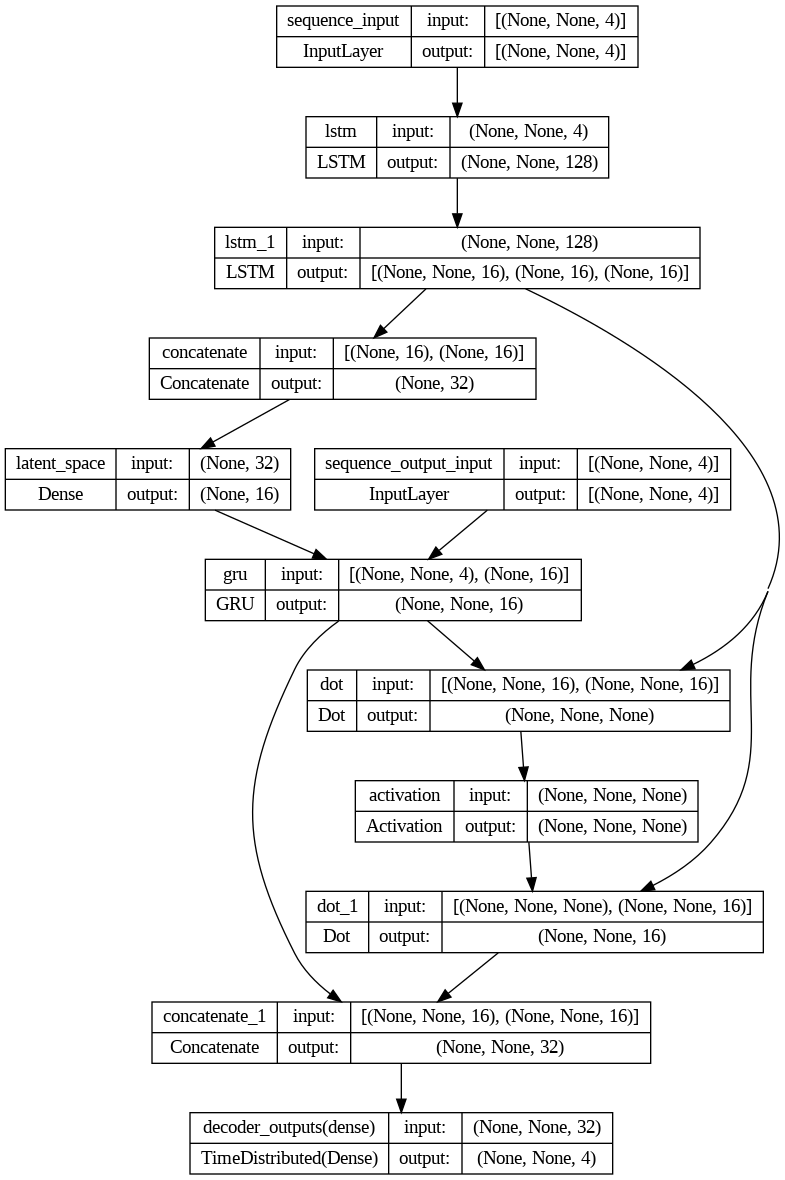

In [ ]:
average_loss = np.average(training_history.history['loss'])
print("Average test loss: ", round(average_loss , 4))
plot_model(model1, show_shapes=True, show_layer_names=True)

save model

In [ ]:
# save the model to disk
model2.save(my_drive_path)

load model

In [ ]:
model = keras.models.load_model(my_drive_path)

predictions

In [ ]:
encoder = Model(model1.input, model1.get_layer("latent_space").output)
predictions = encoder.predict(inputs, batch_size = batch_size,verbose=1)

9/9 [==============================] - 7s 738ms/step


In [ ]:
encoder = Model(model2.input, model2.get_layer("latent_space").output)
predictions = encoder.predict(inputs, batch_size = batch_size,verbose=1)

4/4 [==============================] - 4s 687ms/step


In [ ]:
# Enable eager execution
tf.config.experimental_run_functions_eagerly(True)

# Assuming you have the following input data:
# sequence_input_array, embedding_input_array, and sequence_output_input_array

# Prepare the inputs for the encoder
sequence_input = sequence_input_array  # (num_samples, sequence_length, num_dynamic_features)

categorical_inputs = []
for i, (num_categories, embedding_size) in enumerate(embedding_sizes):
    categorical_inputs.append(embedding_input_array[i])  # (num_samples, sequence_length)

# Desired number of samples
desired_samples = sequence_input_array.shape[0]

# Calculate the number of repetitions required for each ndarray
num_repetitions = desired_samples // 60  # This will give the number of times each ndarray needs to be repeated
remaining_samples = desired_samples % 60  # This will give the number of remaining samples that need to be added


# Create the reshaped categorical_inputs list
reshaped_categorical_inputs = []

# Repeat each ndarray in the list num_repetitions times
for inp in categorical_inputs:
    repeated_inp = np.tile(inp, (num_repetitions, 1))
    reshaped_categorical_inputs.append(repeated_inp)

# Add the remaining samples by slicing the original ndarrays
for i in range(len(categorical_inputs)):
    reshaped_categorical_inputs[i] = np.vstack((reshaped_categorical_inputs[i], categorical_inputs[i][:remaining_samples]))

# Create the encoder model
encoder = Model(model3.input, model3.get_layer("latent_space").output)

# Make predictions using the encoder for each sample
predictions = []
for i in range(sequence_input_array.shape[0]):
    sample_sequence_input = np.expand_dims(sequence_input[i], axis=0)  # Add a batch dimension
    sample_categorical_inputs = [np.expand_dims(inp[i], axis=0) for inp in reshaped_categorical_inputs]  # Add a batch dimension for each categorical input
    sample_sequence_output_input = np.expand_dims(sequence_output_input_array[i], axis=0)  # Add a batch dimension for the fictive input
    prediction = encoder.predict([sample_sequence_input] + sample_categorical_inputs + [sample_sequence_output_input])[0]  # Get the prediction from the list
    predictions.append(prediction)

Instructions for updating:
Use `tf.config.run_functions_eagerly` instead of the experimental version.
/usr/local/lib/python3.10/dist-packages/tensorflow/python/data/ops/structured_function.py:254: UserWarning:

Even though the `tf.config.experimental_run_functions_eagerly` option is set, this option does not apply to tf.data functions. To force eager execution of tf.data functions, please use `tf.data.experimental.enable_debug_mode()`.



1/1 [==============================] - 0s 208ms/step


cluster number + PCA dim

In [ ]:
opt_cluster_numbers = 3
n_components = 2

data process for clustering

In [ ]:
# encoder-decoder LSTM features
sc = StandardScaler()
standard_predictions = sc.fit_transform(predictions)
pca = PCA(n_components=n_components)
X_predictions = pca.fit_transform(standard_predictions)

# # Dynamic time warping features
distance_matrix = sequence_input_array_2_dim

sc = StandardScaler()
standard_distance_matrix = sc.fit_transform(distance_matrix)
pca = PCA(n_components=n_components)
X_distance_matrix = pca.fit_transform(standard_distance_matrix/5)

# permutations features
sc = StandardScaler()
standard_static = sc.fit_transform(static_input_array)
pca = PCA(n_components=n_components)
D = pca.fit_transform(standard_static)

F = X_predictions
final_feature_set = np.concatenate((X_standard_static,F), axis=1)

sc = StandardScaler()
standard_hybrid = sc.fit_transform(final_feature_set)
pca = PCA(n_components=n_components)
X_hybrid = pca.fit_transform(standard_hybrid)

clusters scores and plots function

In [ ]:
def get_scatter(X, name, cluster_number, pca_n_components=None):
  if name != 'dtw':
    kmeans = KMeans(n_clusters = cluster_number, **kmeans_kwargs)
  else:
    kmeans = TimeSeriesKMeans(n_clusters=cluster_number, metric="dtw",
                         max_iter=10, random_state=0)
  kmeans.fit(X)
  labels = kmeans.labels_

  unique, counts = np.unique(labels, return_counts=True)
  cluster_count = dict(zip(unique, counts))

  silhouette = round(silhouette_score(X, labels),3)

  davies_bouldin = round(davies_bouldin_score(X, labels),3)
  if name == 'dtw':
    pca = PCA(n_components=pca_n_components)
    X = pca.fit_transform(X)
  # distance_matrices = pairwise_distances(X)
  # dunk = dunn(labels, distance_matrices)

  print(name)
  # print(cluster_count)
  # print("Silhouette: ", silhouette , " The best value is 1 and the worst value is -1.")
  # print("Davies–Bouldin index: ", davies_bouldin, " lower values indicating better clustering.")
  # print("Dunn index: ", round(dunk, 6))
  print(silhouette ,"&",davies_bouldin)

  scatter =  go.Scatter(x=X[:, 0], y=X[:, 1],mode='markers',
        marker=dict(
            color=labels,
            line_width=1
        ))

  return scatter

In [ ]:
def get_score(X, name, cluster_number, pca_n_components=None):
  if name != 'dtw':
    kmeans = KMeans(n_clusters = cluster_number, **kmeans_kwargs)
  else:
    kmeans = TimeSeriesKMeans(n_clusters=cluster_number, metric="dtw",
                         max_iter=10, random_state=0)
  kmeans.fit(X)
  labels = kmeans.labels_

  unique, counts = np.unique(labels, return_counts=True)
  cluster_count = dict(zip(unique, counts))

  silhouette = round(silhouette_score(X, labels),3)

  davies_bouldin = round(davies_bouldin_score(X, labels),3)

  print(name)
  # print(cluster_count)
  # print("Silhouette: ", silhouette , " The best value is 1 and the worst value is -1.")
  # print("Davies–Bouldin index: ", davies_bouldin, " lower values indicating better clustering.")
  # print("Dunn index: ", round(dunk, 6))
  print(f"Silhouette: {silhouette} ,Davies–Bouldin index: {davies_bouldin}")
  return silhouette, davies_bouldin


clusters scores and plots

In [ ]:
fig = make_subplots(rows=4, cols=1, shared_xaxes=True,
                    subplot_titles=("Encoder-Decoder LSTM", "Dynamic Time Warping","RAW normelize data Score","Hybrid Approach"),
                    vertical_spacing=0.02)

fig.add_trace(get_scatter(X_predictions,"X_predictions",cluster_number=2),row=1, col=1)

fig.add_trace(get_scatter(sequence_input_array_2_dim,"dtw",cluster_number=2, pca_n_components=2),row=2, col=1)

fig.add_trace(get_scatter(X_rfm,"X_raw_normelize", cluster_number=2),row=3, col=1)

fig.add_trace(get_scatter(X_hybrid,"X_hybrid",cluster_number=2),row=4, col=1)

fig.update_layout(height=800, width=1000, title_text=f"results clustering. number of clusters: {2}")
fig.show()

X_predictions
0.986 & 0.011


Exception ignored on calling ctypes callback function: <function ExecutionEngine._raw_object_cache_notify at 0x7ecb04aceef0>
Traceback (most recent call last):
  File "/usr/local/lib/python3.10/dist-packages/llvmlite/binding/executionengine.py", line 171, in _raw_object_cache_notify
    def _raw_object_cache_notify(self, data):
KeyboardInterrupt: 


KeyboardInterrupt: ignored

only score

In [ ]:

for i in range(2, 7):
  print("num of clusters:" ,i)
  get_score(X_predictions,"X_predictions",cluster_number=i)
  get_score(sequence_input_array_2_dim,"dtw",cluster_number=i, pca_n_components=2)
  get_score(X_rfm,"X_raw_normelize", cluster_number=i)
  get_score(X_hybrid,"X_hybrid",cluster_number=i)

num of clusters: 2
X_predictions
Silhouette: 0.8640000224113464 ,Davies–Bouldin index: 0.374
dtw
Silhouette: 0.632 ,Davies–Bouldin index: 0.703
X_raw_normelize
Silhouette: 0.475 ,Davies–Bouldin index: 1.231
X_hybrid
Silhouette: 0.402 ,Davies–Bouldin index: 1.088
num of clusters: 3
X_predictions
Silhouette: 0.9089999794960022 ,Davies–Bouldin index: 0.55
dtw
Silhouette: 0.647 ,Davies–Bouldin index: 1.683
X_raw_normelize
Silhouette: 0.487 ,Davies–Bouldin index: 0.684
X_hybrid
Silhouette: 0.418 ,Davies–Bouldin index: 0.887
num of clusters: 4
X_predictions
Silhouette: 0.9210000038146973 ,Davies–Bouldin index: 0.592
dtw
Silhouette: 0.389 ,Davies–Bouldin index: 2.552
